# Analyse des données traffic de Lille

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  
import math
from scipy.spatial import Voronoi, voronoi_plot_2d,ConvexHull

In [2]:
loc_lille=pd.read_csv("BS_Locations/Lille_antenna_location2.csv")
loc=pd.read_csv("BS_Locations/Lille_antenna_location2.csv")
del(loc['LocInfo'])
traffic_lille=pd.read_csv("data/Lille/Lille_traite.csv")

In [3]:
fichier = open("Lille/Lille.csv",'r')
fichier2 = open("Lille/Lille2.csv",'w')        # On rajoute un tilde à la fin pour éviter d'écraser le fichier source en cas de bug
lignes = fichier.readlines()                # On parcours les lignes du fichier source
for ligne in lignes:
    ligneFinale = ligne.replace(';',', ')            # On remplace tout les espaces par groupe de 4 en tabulation
    fichier2.write(ligneFinale)             # On écrit la nouvelle ligne dans le nouveau fichier
                 
fichier.close()                     # Fermeture du fichier source
fichier2.close()
            
traffic_lille=pd.read_csv("Lille/Lille2.csv")
print(traffic_lille[6580900:,])

FileNotFoundError: [Errno 2] No such file or directory: 'Lille/Lille.csv'

In [4]:
time=set(traffic_lille[' TimeSlot'])
len(time)

12859

In [5]:
RRh_ID=set(traffic_lille['CellID'])


In [6]:
minima = min(min(traffic_lille[' ByteUp']),min(traffic_lille[' ByteDn']))
maxima = max(max(traffic_lille[' ByteUp']),max(traffic_lille[' ByteDn']))
print('Min traffic up : ',min(traffic_lille[' ByteUp']),' Max traffic up : ',max(traffic_lille[' ByteUp']))
print('Min traffic down : ',min(traffic_lille[' ByteDn']),' Max traffic down : ',max(traffic_lille[' ByteDn']))

Min traffic up :  0.0  Max traffic up :  7249226387.374723
Min traffic down :  0.0  Max traffic down :  15828358767.955057


In [7]:
d={}
for t in range(len(traffic_lille)):
    id=traffic_lille['CellID'][t]
    tm=traffic_lille[' TimeSlot'][t]
    if(id in d.keys()):
        date=tm[1:11]
        heur=tm[12:17]
        if(date not in d[id].keys()):
            d[id][date]={}
        d[id][date][heur]=(traffic_lille[' ByteUp'][t],traffic_lille[' ByteDn'][t])
    else:
        d[id]={}

In [8]:
d['0002f81013073f26']

{'2019-03-19': {'18:20': (53980.43765647805, 2958856.151161401),
  '18:40': (28010.397064366833, 142533.35881275294),
  '18:50': (571.0050146650598, 15995.560150893758),
  '19:00': (537.5799253857448, 13911.673911718257),
  '19:10': (217.77770958337857, 46.70106487207055),
  '19:20': (87557.88597110435, 4309113.447858212),
  '19:30': (39.29719513617306, 7.144448772241581),
  '19:40': (45.29009667714086, 8.233991624044762),
  '19:50': (1220.1478971444494, 512.1999216099757),
  '20:00': (37.580480467496635, 6.832340491627309),
  '20:10': (26.839042757532805, 28.387314898704496),
  '20:20': (90934.34926424653, 5421.7182302107785),
  '20:30': (44.80227480942096, 189.8116507610844),
  '20:40': (70489.02264141396, 1313991.3399860605),
  '21:00': (1325.088739938439, 38844.67902984721),
  '21:10': (549.6718196213527, 1074.5370592810148),
  '22:30': (38.835830068362796, 29.629370929819334),
  '22:40': (29718.499805310497, 463293.43740220775),
  '22:50': (134.6642839229578, 3548.7988964236047),


### Trafic agrégé sur tout les rrhs

In [ ]:
#Not_working
dates=[]
heurs=[]
for rrh in d:
    for date in d[rrh].keys():
        if(date!='loc'):
            dates.append(dates)
            for heur in d[rrh][date].keys():
                heurs.append(heur)
dates=set(np.array(dates))
heurs=set(np.array(heurs))
print(dates)

In [ ]:
d_ag

In [72]:
#Pour un jour précit: 2019-03-20
rrh='0002f81013073f26'
date='2019-03-20'
#rrh='8102f81000014344'
date='2019-06-10'
x=[i for i in d[rrh][date].keys()]
y=[i for i in d[rrh][date].values()] 
y_bu=[i[0] for i in list(y)]
y_bd=[i[1] for i in list(y)]

### Byte up

In [73]:
print('Le traffic max en UP est de : ',max(y_bu))
print('Le traffic min en UP est de : ',min(y_bu))

Le traffic max en UP est de :  170832.59088949562
Le traffic min en UP est de :  4.517194322689424


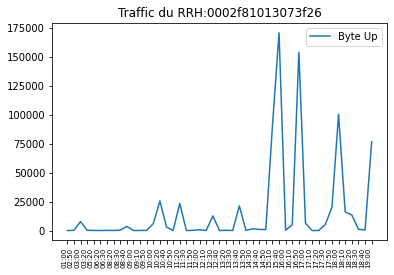

In [74]:
y1=y_bu[:47]
x1=x[:47]
plt.title("Traffic du RRH:"+rrh)
plt.plot(x1, y1, label="Byte Up")
plt.xticks(rotation=90, ha='right',fontsize=7)
plt.legend()
plt.show()

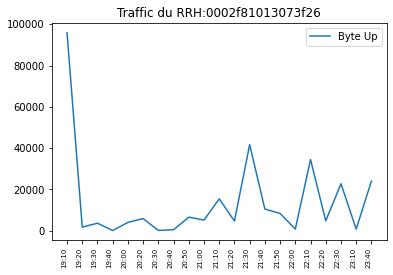

In [75]:
y1=y_bu[47:]
x1=x[47:]
plt.title("Traffic du RRH:"+rrh)
plt.plot(x1, y1, label="Byte Up")
plt.xticks(rotation=90, ha='right',fontsize=7)
plt.legend()
plt.show()

### Byte down

In [76]:
print('Le traffic max en Down est de : ',max(y_bd))
print('Le traffic min en Down est de : ',min(y_bd))
print(len(y_bd))

Le traffic max en Down est de :  1511880.8109863715
Le traffic min en Down est de :  1.6471374840282167
68


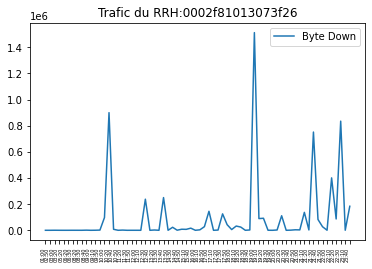

In [77]:
n=69
y2=y_bd[:n]
x1=x[:n]
plt.title("Trafic du RRH:"+rrh)
plt.plot(x1, y2, label="Byte Down")
plt.xticks(rotation=90, ha='right',fontsize=5)
plt.legend()
plt.show()

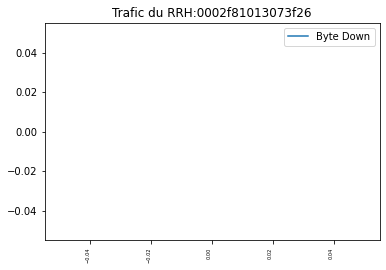

In [78]:
y2=y_bd[n:]
x1=x[n:]
plt.title("Trafic du RRH:"+rrh)
plt.plot(x1, y2, label="Byte Down")
plt.xticks(rotation=90, ha='right',fontsize=5)
plt.legend()
plt.show()

### Comparaison

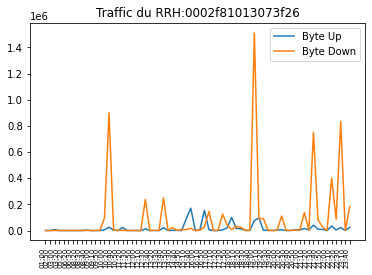

In [79]:
y1=y_bu
y2=y_bd
x1=x
plt.title("Traffic du RRH:"+rrh)
plt.plot(x1, y1, label="Byte Up")
plt.plot(x1, y2, label="Byte Down")
plt.xticks(rotation=90, ha='right',fontsize=7)
plt.legend()
plt.show()

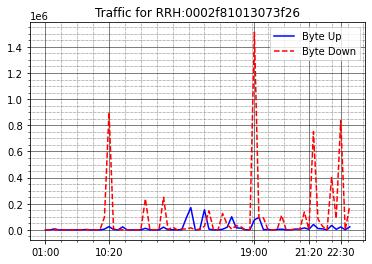

In [85]:
fig, ax = plt.subplots()
ax.plot(y_bu, color='blue',label="Byte Up")
ax.plot(y_bd,'--r', color='red',label="Byte Down")

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()
st=[0, 14, 46, 58, 65]
plt.xticks(st, [x1[i] for i in st])
plt.title("Traffic for RRH:"+rrh)
plt.legend()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

0 1207239172.8293655 01:00
1 652523929.9205164 01:10
2 789761990.0384947 01:20
3 560917243.6359687 01:30
4 848795533.6250403 01:40
5 1139697145.860135 01:50
6 2124244274.7541664 02:00
7 507860436.47963166 02:10
8 414777527.87253326 02:20
9 784261008.5724847 02:30
10 336779321.76015764 02:40
11 531489192.68754673 02:50
12 380445259.04633486 03:00
13 607655267.4877512 03:10
14 304576895.17799246 03:20
15 436030394.6671294 03:30
16 394458487.00630295 03:40
17 499494259.3943496 03:50
18 459093308.821836 04:00
19 576119566.4115093 04:10
20 536729703.6987549 04:20
21 317801483.32909346 04:30
22 153040924.12230217 04:40
23 147909813.28365225 04:50
24 161607106.6578105 05:00
25 95882183.62712568 05:10
26 78787097.56881693 05:20
27 19406845.190439913 05:30
28 159314431.68255568 05:40
29 186932041.49363795 05:50
30 93557253.84848216 06:00
31 162539976.55220532 06:10
32 25577494.566199746 06:20
33 67182229.33986148 06:30
34 113820084.31824777 06:40
35 90523945.76486178 06:50
36 115226285.38950372

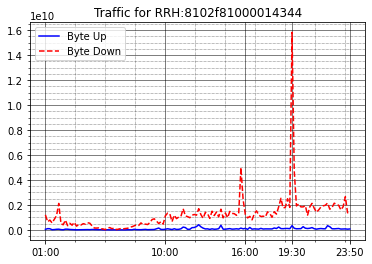

In [71]:
fig, ax = plt.subplots()
ax.plot(y_bu, color='blue',label="Byte Up")
ax.plot(y_bd,'--r', color='red',label="Byte Down")

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()
st=[0, 54, 90, 111, 137]
plt.xticks(st, [x1[i] for i in st])
plt.title("Traffic for RRH:"+rrh)
plt.legend()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')



for i in range(len(y_bd)):
    print(i,y_bd[i],x1[i])

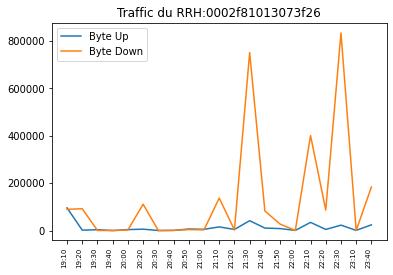

In [39]:
y1=y_bu[47:]
y2=y_bd[47:]
x1=x[47:]
plt.title("Traffic du RRH:"+rrh)
plt.plot(x1, y1, label="Byte Up")
plt.plot(x1, y2, label="Byte Down")
plt.xticks(rotation=90, ha='right',fontsize=7)
plt.legend()
plt.show()

In [5]:
fichier = open("BS_Locations/Lille_antenna_location.csv",'r')
fichier2 = open("BS_Locations/Lille_antenna_location2.csv",'w')        # On rajoute un tilde à la fin pour éviter d'écraser le fichier source en cas de bug
lignes = fichier.readlines()                # On parcours les lignes du fichier source
for ligne in lignes:
    ligneFinale = ligne.replace(';',', ')            # On remplace tout les espaces par groupe de 4 en tabulation
    fichier2.write(ligneFinale)             # On écrit la nouvelle ligne dans le nouveau fichier
                 
fichier.close()                     # Fermeture du fichier source
fichier2.close()
            
loc_lille=pd.read_csv("BS_Locations/Lille_antenna_location2.csv")
print(loc_lille)

               LocInfo   Coord_X   Coord_y
0     0102f81000655dd0    651625   2626995
1     0102f8100065b98d    652120   2627118
2     0102f81000652901    653420   2625730
3     0102f8100065087d    648111   2624325
4     0102f8100065b721    650285   2625320
...                ...       ...       ...
1389  0002f8101306bfd5    648250   2627725
1390  0002f81013063f09    652584   2626121
1391  0002f8101306579d    653189   2625159
1392  0002f8101307ea7b    651000   2624075
1393  0002f81013064bdc    651280   2627695

[1394 rows x 3 columns]


In [97]:
len(set(loc_lille['LocInfo']))

1394

In [6]:
for i in range(len(loc_lille)):
    k=loc_lille['LocInfo'][i]
    if(k in d.keys()):
        d[k]['loc']=(loc_lille[' Coord_X'][i],loc_lille[' Coord_y'][i])

In [370]:
print(d['0002f81013073f26'].keys())

dict_keys(['2019-03-19', '2019-03-20', '2019-03-21', '2019-03-22', '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28', '2019-03-29', '2019-03-30', '2019-04-01', '2019-04-03', '2019-04-04', '2019-04-05', '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-29', '2019-04-30', '2019-03-16', '2019-03-17', '2019-05-01', '2019-05-02', '2019-05-03', '2019-05-04', '2019-05-05', '2019-05-06', '2019-05-07', '2019-05-08', '2019-05-09', '2019-05-11', '2019-05-12', '2019-05-13', '2019-05-16', '2019-05-17', '2019-05-18', '2019-05-26', '2019-05-27', '2019-05-29', '2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06', '2019-06-07', '2019-06-12', '2019-06-13', '2019-06-14', '2019-06-15', '2019-03-18', '2019-03-24', '2019-04-07', '2019-04-13', '2019-04-20', '2019-04-21', '2019-04-28', '2019-04-14', '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-19', '2019-03-31', '2019-04-02', '2019-04-06', '2019-05-19', '2019-05-20', '2019-05-21', '2019-05-22', '2019-05-

In [ ]:
def getData_save(date,heur,d):
    coordX=[]
    coordY=[]
    coord=[]
    traf=[]
    for i in d.keys():
        x=d[i]['loc'][0]
        y=d[i]['loc'][1]
        ind=-1
        if([x,y] not in coord):
            coordX.append(x)
            coordY.append(y)
            coord.append([x,y])
            ind=coord.index([x,y])
        if(date in d[i].keys()):
            if(heur in d[i][date].keys() ):
                if(ind !=-1):
                    traf.append(d[i][date][heur][1])
                else:
                    if(traf[ind]<d[i][date][heur][1]):
                        traf[ind]=d[i][date][heur][1]
            else:
                if(ind !=-1):
                    traf.append(0)
        else:
            if(ind !=-1):
                traf.append(0)
            else:
                traf[ind]=0
    return coord,coordX,coordY,traf

#### Test traffic 

In [14]:
def getData(heur,d):
    coordX=[]
    coordY=[]
    coord=[]
    traf=[]
    for i in d.keys():
        x=d[i]['loc'][0]
        y=d[i]['loc'][1]
        ind=-1
        if([x,y] not in coord):
            coordX.append(x)
            coordY.append(y)
            coord.append([x,y])
            cpt=0
            long=0
            for date in d[i].keys():
                if(date!='loc'):
                    if(heur in d[i][date].keys() ):
                        cpt+=d[i][date][heur][1]
                        long+=1
            if(long==0):
                traf.append(0)
            else:
                traf.append(cpt/long)
            
    return coord,coordX,coordY,traf

In [16]:
coord,coordX,coordY,traf=getData('10:00',d)
traf

[2125553.1542085344,
 13412132.361422688,
 9989018.400987362,
 12986817.364607414,
 17410118.40334505,
 8953302.651134556,
 7352216.856840401,
 6466692.363507069,
 11102203.859268975,
 19993111.16349626,
 24323459.151575986,
 279089.6925285811,
 2964299.99005177,
 18522331.90626569,
 5921492.073414591,
 6772388.411465072,
 12233228.379271016,
 34086709.31092394,
 22382937.45613895,
 14220284.788457274,
 44581011.57826236,
 7911030.877481036,
 440606.3270484756,
 14160505.988680106,
 3283783.2362400074,
 1152360126.2982605,
 1358175.101143598,
 4237173.729154564,
 5408707.741803142,
 7402000.541511526,
 9701924.739651542,
 1680882.2737995733,
 20010823.68433983,
 14771052.0944405,
 2773777.3721244875,
 3218710.2469409467,
 6859165.158994916,
 2568546.123981168,
 530292606.1323658,
 1636203.1272499796,
 8516543.325565238,
 18651687.085068706,
 33025995.459429994,
 3210125.2617743635,
 1862982120.1759584,
 3644194.0468783746,
 17675693.034249023,
 6464323.801051899,
 6124487.932883552,
 1

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
import matplotlib as mpl
from matplotlib import cm
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)
def affichage_vor(coord,traf,minima,maxima,date,heur ):
    # make up data points
    points = coord
    speed=traf

    # find min/max values for normalization
    #minima = min(min(y_bd),min(y_bu))
    #maxima = max(max(y_bd),max(y_bu))

    # normalize chosen colormap
    norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.copper_r)



    # compute Voronoi tesselation
    vor = Voronoi(coord)
    fig=voronoi_plot_2d(vor, show_points=True, show_vertices=False, s=1)

    # plot
    regions, vertices = voronoi_finite_polygons_2d(vor)



    # colorize
    r=0
    for region in regions:
        polygon = vertices[region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(speed[r])) 
        r+=1

    """for r in range(len(vor.point_region)):
        region = vor.regions[vor.point_region[r]]
        #if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(speed[r])) """

    plt.plot(coordX, coordY, 'ko',markersize=1)
    plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
    plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
    fig.tight_layout(rect=[0, 0, 0.85, 0.95])
    ax_cb = fig.add_axes([0.85, 0.10, 0.05, 0.8])
    cb = mpl.colorbar.ColorbarBase(ax_cb, cmap=cm.copper_r,norm=norm, orientation='vertical')
    fig.suptitle('Trafic du '+date+' à '+heur, fontsize=10)
    plt.show()
    plt.show()

In [67]:
for rrh in d:
    for date in d[rrh].keys():
        if(date!='loc'):
            for heur in d[rrh][date].keys():
                if(d[rrh][date][heur][1]>15828358760):
                    print(rrh,date,heur)

8102f81000014344 2019-06-10 19:30


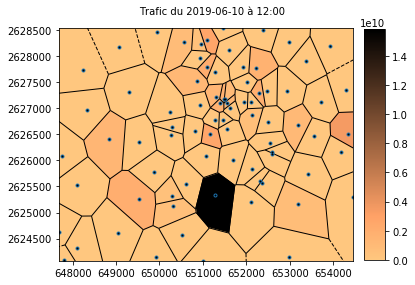

In [96]:
coord,coordX,coordY,traf=getData('2019-06-10','19:30',d)
affichage_vor(coord,traf,minima,maxima,'2019-06-10','12:00')

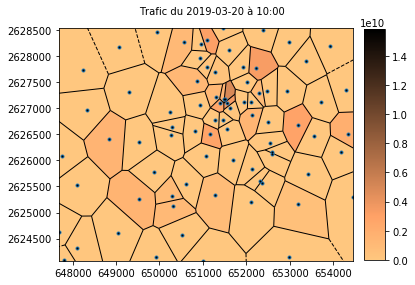

In [88]:
coord,coordX,coordY,traf=getData('2019-03-20','10:00',d)
affichage_vor(coord,traf,minima,maxima,'2019-03-20','10:00')

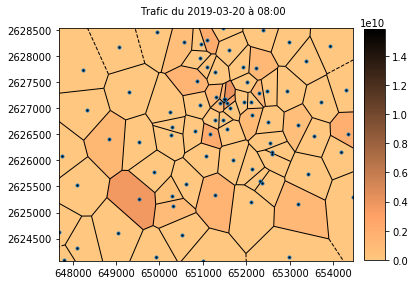

In [89]:
coord,coordX,coordY,traf=getData('2019-03-20','08:00',d)
affichage_vor(coord,traf,minima,maxima,'2019-03-20','08:00')

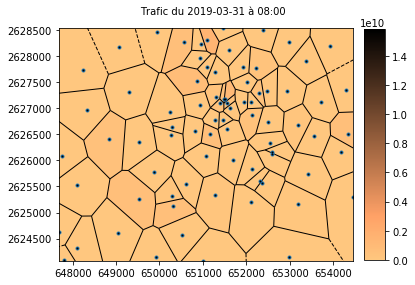

In [90]:
coord,coordX,coordY,traf=getData('2019-03-31','08:00',d) #weekend
affichage_vor(coord,traf,minima,maxima,'2019-03-31','08:00')

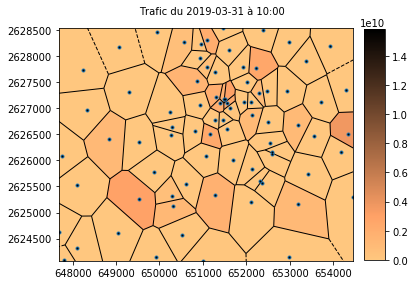

In [97]:
coord,coordX,coordY,traf=getData('2019-03-31','19:30',d) #weekend
affichage_vor(coord,traf,minima,maxima,'2019-03-31','10:00')

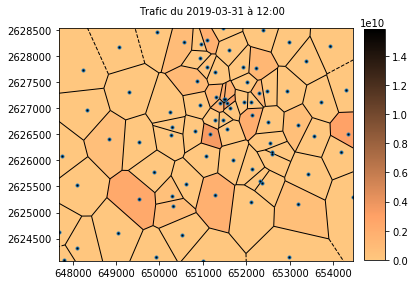

3516052616.6409845


In [92]:
coord,coordX,coordY,traf=getData('2019-03-31','12:00',d) #weekend
affichage_vor(coord,traf,minima,maxima,'2019-03-31','12:00')
print(max(traf))

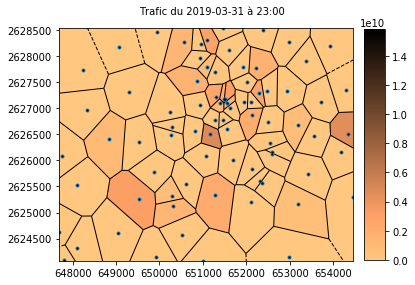

In [93]:
coord,coordX,coordY,traf=getData('2019-03-31','23:00',d) #weekend
affichage_vor(coord,traf,minima,maxima,'2019-03-31','23:00')

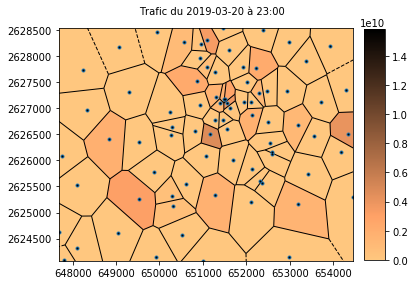

In [94]:
coord,coordX,coordY,traf=getData('2019-03-20','23:00',d) 
affichage_vor(coord,traf,minima,maxima,'2019-03-20','23:00')

### Regions les plus actives

In [18]:
def affichage_vor_pa(coord,traf,minima,maxima,caption,opt,val):
    # make up data points
    points = coord
    speed=traf
    mean=np.mean(traf)
    # find min/max values for normalization
    #minima = min(min(y_bd),min(y_bu))
    #maxima = max(max(y_bd),max(y_bu))

    # normalize chosen colormap
    norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.copper_r)



    # compute Voronoi tesselation
    vor = Voronoi(coord)
    fig=voronoi_plot_2d(vor, show_points=True, show_vertices=False, s=1)

    # plot
    regions, vertices = voronoi_finite_polygons_2d(vor)



    # colorize
    r=0
    for region in regions:
        polygon = vertices[region]
        if(opt=='sup' and speed[r]>val):
            plt.fill(*zip(*polygon), color=mapper.to_rgba(speed[r])) 
        if(opt=='inf' and speed[r]<val):
            plt.fill(*zip(*polygon), color=mapper.to_rgba(speed[r])) 
        if(opt=='equal' and speed[r]==(val)):
            plt.fill(*zip(*polygon), color=mapper.to_rgba(speed[r])) 
        
        r+=1

    """for r in range(len(vor.point_region)):
        region = vor.regions[vor.point_region[r]]
        #if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(speed[r])) """

    plt.plot(coordX, coordY, 'ko',markersize=1)
    plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
    plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
    fig.tight_layout(rect=[0, 0, 0.85, 0.95])
    ax_cb = fig.add_axes([0.85, 0.10, 0.05, 0.8])
    cb = mpl.colorbar.ColorbarBase(ax_cb, cmap=cm.copper_r,norm=norm, orientation='vertical')
    fig.suptitle(caption, fontsize=10)
    plt.show()
    plt.show()

In [51]:

rrh='0002f81013073f26'
date='2019-03-20'
horaires=list(d[rrh][date].keys())
horaires

['01:20',
 '02:20',
 '03:10',
 '05:30',
 '06:10',
 '06:40',
 '07:20',
 '07:30',
 '07:40',
 '07:50',
 '08:00',
 '08:10',
 '08:20',
 '08:30',
 '08:40',
 '08:50',
 '09:00',
 '09:10',
 '09:20',
 '09:30',
 '09:40',
 '09:50',
 '10:00',
 '10:10',
 '10:20',
 '10:30',
 '10:40',
 '10:50',
 '11:00',
 '11:10',
 '11:20',
 '11:30',
 '11:40',
 '11:50',
 '12:00',
 '12:10',
 '12:20',
 '12:30',
 '12:40',
 '12:50',
 '13:00',
 '13:10',
 '13:20',
 '13:30',
 '13:40',
 '13:50',
 '14:00',
 '14:20',
 '14:30',
 '14:40',
 '14:50',
 '15:00',
 '15:10',
 '15:20',
 '15:30',
 '15:40',
 '16:00',
 '16:10',
 '16:20',
 '16:30',
 '16:40',
 '16:50',
 '17:00',
 '17:10',
 '17:20',
 '17:30',
 '17:40',
 '17:50',
 '18:00',
 '18:10',
 '18:20',
 '18:30',
 '18:40',
 '18:50',
 '19:00',
 '19:10',
 '19:20',
 '19:30',
 '19:40',
 '20:20',
 '20:30',
 '20:40',
 '20:50',
 '21:10',
 '21:20',
 '21:30',
 '21:40',
 '21:50',
 '22:10',
 '22:30',
 '22:50',
 '23:00',
 '23:20',
 '23:40']

In [56]:
"""def getData_heur(heur,d):
    coordX=[]
    coordY=[]
    coord=[]
    traf=[]
    for i in d.keys():
        x=d[i]['loc'][0]
        y=d[i]['loc'][1]
        ind=-1
        if([x,y] not in coord):
            coordX.append(x)
            coordY.append(y)
            coord.append([x,y])
            cpt=0
            long=0
            for date in d[i].keys():
                if(date!='loc'):
                    if(heur in d[i][date].keys() ):
                        cpt+=d[i][date][heur][1]
                        long+=1
            if(long==0):
                traf.append(0)
            else:
                traf.append(cpt/long)
            
    return traf
traf=np.zeros(79)
for h in horaires:
    traf+=getData(h,d)
#traf=[i/len(horaires) for i in traf]
traf"""

"def getData_heur(heur,d):\n    coordX=[]\n    coordY=[]\n    coord=[]\n    traf=[]\n    for i in d.keys():\n        x=d[i]['loc'][0]\n        y=d[i]['loc'][1]\n        ind=-1\n        if([x,y] not in coord):\n            coordX.append(x)\n            coordY.append(y)\n            coord.append([x,y])\n            cpt=0\n            long=0\n            for date in d[i].keys():\n                if(date!='loc'):\n                    if(heur in d[i][date].keys() ):\n                        cpt+=d[i][date][heur][1]\n                        long+=1\n            if(long==0):\n                traf.append(0)\n            else:\n                traf.append(cpt/long)\n            \n    return traf\ntraf=np.zeros(79)\nfor h in horaires:\n    traf+=getData(h,d)\n#traf=[i/len(horaires) for i in traf]\ntraf"

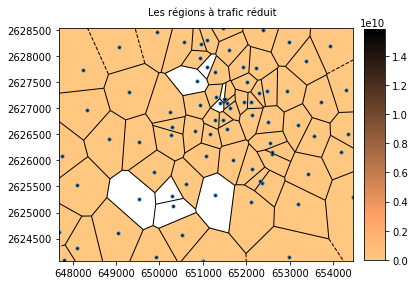

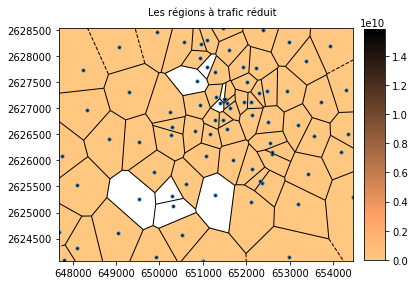

In [69]:
coord,coordX,coordY,traf=getData('08:00',d)
#(coord,traf,minima,maxima,caption,opt,val)
affichage_vor_pa(coord,traf,minima,maxima,"Les régions à trafic réduit","inf",np.mean(traf))
affichage_vor_pa(coord,traf,minima,maxima,"Les régions à trafic réduit","inf",2*np.mean(traf))

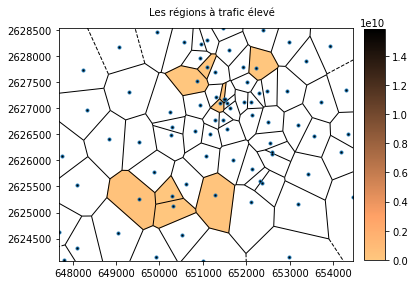

In [70]:
coord,coordX,coordY,traf=getData('06:00',d)
#(coord,traf,minima,maxima,caption,opt,val)
affichage_vor_pa(coord,traf,minima,maxima,"Les régions à trafic élevé","sup",2*np.mean(traf))

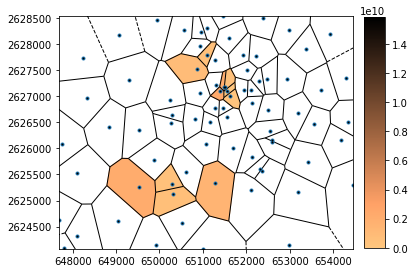

In [22]:
coord,coordX,coordY,traf=getData('12:00',d)
affichage_vor_pa(coord,traf,minima,maxima,"","sup",np.mean(traf))

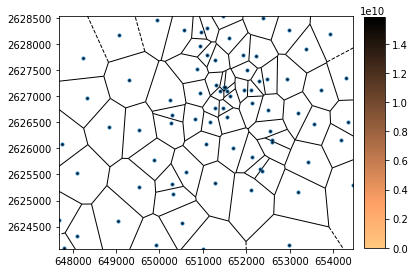

In [24]:
oord,coordX,coordY,traf=getData('12:00',d)
affichage_vor_pa(coord,traf,minima,maxima,"","equal",0)

### Correlation ByteUp and ByteDown

In [104]:
BU=list(traffic_lille[' ByteUp'])
BD=list(traffic_lille[' ByteDn'])
np.corrcoef(BU, BD)

array([[1.        , 0.74246069],
       [0.74246069, 1.        ]])

In [25]:
def getData(date,heur,d):
    coordX=[]
    coordY=[]
    coord=[]
    correl=[]
    for i in d.keys(): 
        x=d[i]['loc'][0]
        y=d[i]['loc'][1]
        tu=[]
        td=[]
        ind=-1
        
    return coord,coordX,coordY,correl

In [26]:
coord,coordX,coordY,traf=getData('2019-03-20','10:00',d)

In [27]:
def correlation(d):
    xx=[]
    yy=[]
    for r in(d.keys()):
        for dt in (d[r].keys()):
            if(dt!='loc'):
                for h in (d[r][dt].keys()):
                    xx.append(d[r][dt][h][0])
                    yy.append(d[r][dt][h][1])
    return np.corrcoef(xx,yy)[0][1]
correlation(d)

0.742438716651249

In [28]:
def getDataCorrelation(d):
    coordX=[]
    coordY=[]
    coord=[]
    correl=[]
    for i in d.keys():
        tu=[]
        td=[]
        x=d[i]['loc'][0]
        y=d[i]['loc'][1]
        ind=-1
        if([x,y] not in coord):
            coordX.append(x)
            coordY.append(y)
            coord.append([x,y])
            for date in d[i].keys():
                if(date != 'loc'):
                    for k in d[i][date].keys():
                        tu.append(d[i][date][k][0])
                        td.append(d[i][date][k][1])
            correl.append(np.corrcoef(tu,td)[0][1])
    return coord,coordX,coordY,correl

In [33]:
def affichage_vor_correl(coord,correl,coordX,coordY ):
    # make up data points
    points = coord
    speed=correl

    # find min/max values for normalization
    #minima = min(min(y_bd),min(y_bu))
    #maxima = max(max(y_bd),max(y_bu))

    # normalize chosen colormap
    norm = mpl.colors.Normalize(vmin=0, vmax=1, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.Reds)



    # compute Voronoi tesselation
    vor = Voronoi(coord)
    fig=voronoi_plot_2d(vor, show_points=True, show_vertices=False, s=1)

    # plot
    regions, vertices = voronoi_finite_polygons_2d(vor)



    # colorize
    r=0
    for region in regions:
        polygon = vertices[region]
        if(speed[r]>=0):
            plt.fill(*zip(*polygon), color=mapper.to_rgba(speed[r])) 
        r+=1

    """for r in range(len(vor.point_region)):
        region = vor.regions[vor.point_region[r]]
        #if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(speed[r])) """

    plt.plot(coordX, coordY, 'ko',markersize=1)
    plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
    plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
    fig.tight_layout(rect=[0, 0, 0.85, 0.95])
    ax_cb = fig.add_axes([0.85, 0.10, 0.05, 0.8])
    cb = mpl.colorbar.ColorbarBase(ax_cb, cmap=cm.Reds,norm=norm, orientation='vertical')
    fig.suptitle('Correlation entre bytes up et down', fontsize=10)
    plt.show()
    plt.show()

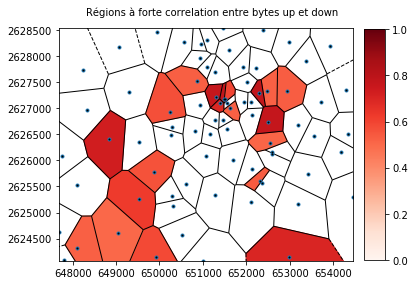

In [30]:
coord,coordX,coordY,correl=getDataCorrelation(d)
affichage_vor_correl(coord,correl,coordX,coordY )

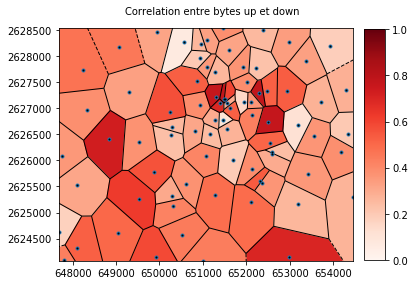

In [34]:
coord,coordX,coordY,correl=getDataCorrelation(d)
affichage_vor_correl(coord,correl,coordX,coordY )

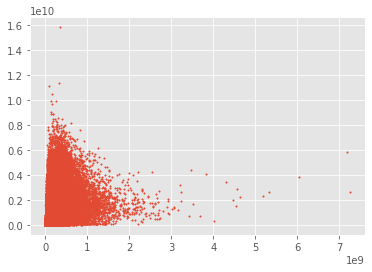

In [103]:
np.corrcoef(BU, BD)
plt.scatter(BU, BD, s=2)
plt.show()

In [127]:
rrh='0002f81013073f26'
date='2019-03-22'
x=[]
y=[]
for k in d[rrh][date].keys():
    x.append(d[rrh][date][k][0])
    y.append(d[rrh][date][k][1])


[[1.         0.24568528]
 [0.24568528 1.        ]]


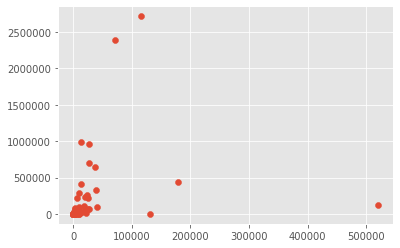

In [128]:
print(np.corrcoef(x, y))
np.corrcoef(x, y)
plt.scatter(x, y)
plt.show()

[[1.         0.37880631]
 [0.37880631 1.        ]]


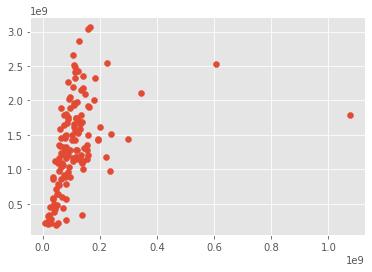

In [123]:
rrh='8102f8100001435c'
date='2019-03-31'
x=[]
y=[]
for k in d[rrh][date].keys():
    x.append(d[rrh][date][k][0])
    y.append(d[rrh][date][k][1])
print(np.corrcoef(x, y))
plt.scatter(x, y)
plt.show()

[[1.         0.72282773]
 [0.72282773 1.        ]]


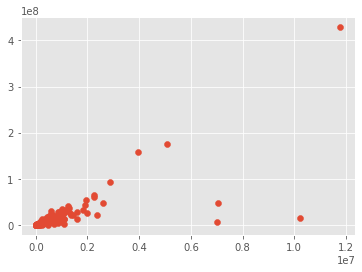

In [129]:
rrh='0102f8100065501b'
date='2019-03-31'
x=[]
y=[]
for k in d[rrh][date].keys():
    x.append(d[rrh][date][k][0])
    y.append(d[rrh][date][k][1])
print(np.corrcoef(x, y))
plt.scatter(x, y)
plt.show()

#### Regions dont le trafic varie le plus

In [35]:
def getData(heur,d):
    coordX=[]
    coordY=[]
    coord=[]
    traf=[]
    for i in d.keys():
        x=d[i]['loc'][0]
        y=d[i]['loc'][1]
        ind=-1
        if([x,y] not in coord):
            coordX.append(x)
            coordY.append(y)
            coord.append([x,y])
            cpt=0
            long=0
            for date in d[i].keys():
                if(date!='loc'):
                    if(heur in d[i][date].keys() ):
                        cpt+=d[i][date][heur][1]
                        long+=1
            if(long==0):
                traf.append(0)
            else:
                traf.append(cpt/long)
            
    return coord,coordX,coordY,traf

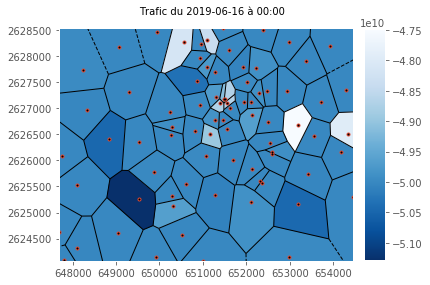

In [251]:
coord,coordX,coordY,traf1=getData('08:00',d)
coord,coordX,coordY,traf2=getData('12:00',d)
len(traf1)
traf3=[traf2[i]-traf1[i]-5000 for i in range(len(traf2))]

affichage_vor(coord,traf3,min(traf3),max(traf3),date,heur)

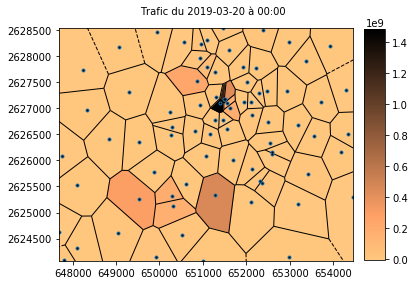

In [71]:
coord,coordX,coordY,traf1=getData('08:00',d)
coord,coordX,coordY,traf2=getData('12:00',d)
len(traf1)
traf3=[traf2[i]-traf1[i]-5000 for i in range(len(traf2))]

affichage_vor(coord,traf3,min(traf3),max(traf3),date,heur)

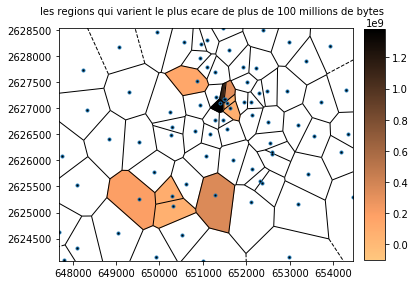

In [74]:
coord,coordX,coordY,traf1=getData('08:00',d)
coord,coordX,coordY,traf2=getData('12:00',d)
traf3=[abs(traf2[i]-traf1[i])-100000000 for i in range(len(traf2))]
affichage_vor_pa(coord,traf3,min(traf3),max(traf3),"les regions qui varient le plus ecare de plus de 100 millions de bytes","sup",0)

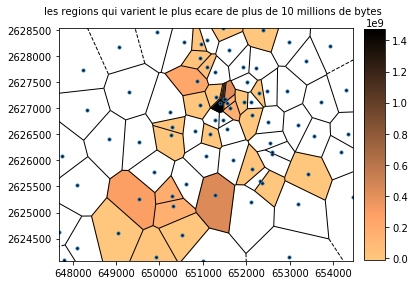

In [73]:
coord,coordX,coordY,traf1=getData('08:00',d)
coord,coordX,coordY,traf2=getData('12:00',d)
traf3=[abs(traf2[i]-traf1[i])-10000000 for i in range(len(traf2))]
affichage_vor_pa(coord,traf3,min(traf3),max(traf3),"les regions qui varient le plus ecare de plus de 10 millions de bytes","sup",0)

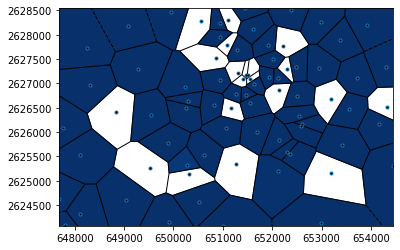

In [16]:
coord,coordX,coordY,traf1=getData('2019-03-20','12:00',d)
affichage_vor_pa(coord,traf1,minima,maxima,"","inf",np.mean(traf1))

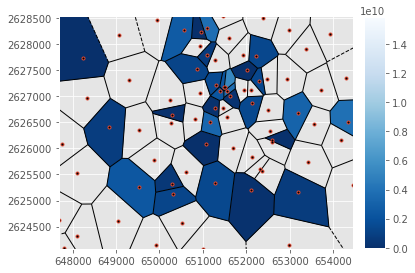

In [283]:
coord,coordX,coordY,traf1=getData('2019-03-20','12:00',d)
affichage_vor_pa(coord,traf1,minima,maxima,date,heur,0.05,"","sup")

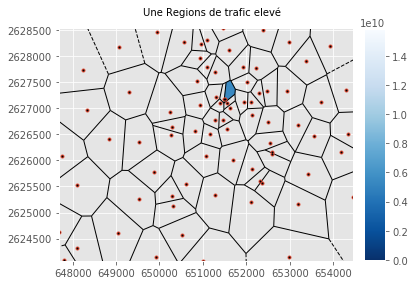

In [286]:
coord,coordX,coordY,traf1=getData('2019-03-20','12:00',d)
affichage_vor_pa(coord,traf1,minima,maxima,date,heur,0.05,"Une Regions de trafic elevé","equal",max(traf1))

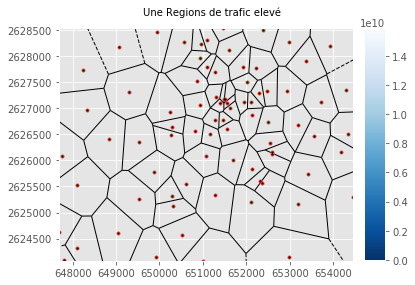

In [386]:
coord,coordX,coordY,traf1=getData('2019-03-20','12:00',d)
traf11=[(traf1[i]+max(traf1)) for i in range(len(traf1))]
affichage_vor_pa(coord,traf11,minima,maxima,"Une Regions de trafic elevé","inf",max(traf1))

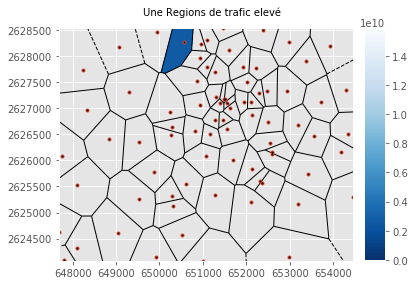

In [387]:
coord,coordX,coordY,traf1=getData('2019-03-20','12:00',d)
affichage_vor_pa(coord,traf1,minima,maxima,"Une Regions de trafic elevé","equal",traf1[67])

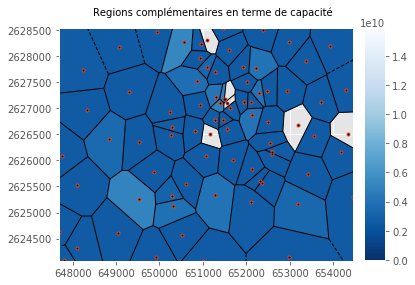

In [404]:
bbu=15828358700
coord,coordX,coordY,traf1=getData('2019-03-20','12:00',d)
traf11=[(lambda i: (traf1[i]+traf1[67]) if (traf1[i]+traf1[67])<max(traf1) else (0))(i) for i in range(len(traf1))]
#traf11=[(traf1[i]+traf1[67]) for i in range(len(traf1))].where(lambda x: x if x <bbu else (0))
#print(traf11)
affichage_vor_pa(coord,traf11,minima,maxima,"Regions complémentaires en terme de capacité","sup",0)

#### Régions complementaires

In [474]:
def regions_comp(rrh,date,d):
    bbu=15828358800
    traf11=[]
    for heur in d[rrh][date].keys():
        coord,coordX,coordY,traf1=getData(date,heur,d)
        t=coord.index([d[rrh]['loc'][0],d[rrh]['loc'][1]])
        if(traf11==[]):
            traf11=[(lambda i: (traf1[i]+traf1[t]) if (traf1[i]+traf1[t])<bbu else (0))(i) for i in range(len(traf1))]
        else:
            traf11=[(lambda i: (traf1[i]+traf1[t]) if ((traf1[i]+traf1[t])<bbu and traf11[i]!=0) else (0))(i) for i in range(len(traf1))] 
        #traf11=[(traf1[i]+traf1[67]) for i in range(len(traf1))].where(lambda x: x if x <bbu else (0))
        
    affichage_vor_pa(coord,traf11,minima,maxima,"Regions complémentaires en terme de capacité","sup",0)
    affichage_vor_pa(coord,traf1,minima,maxima,"Region selectionnée, RRH: 8102f81000014344","equal",traf1[t])

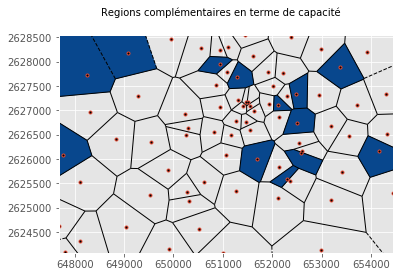

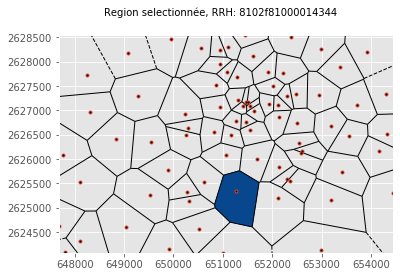

In [475]:
regions_comp('8102f81000014344', '2019-06-10',d)

In [416]:
coord[67]

[650557, 2628274]

In [462]:
for rrh in d.keys():
    for date in d[rrh].keys():
        if(date!='loc'):
            for h in d[rrh][date].keys():
                if(d[rrh][date][h][1]==15828358767.955057):
                    print(rrh, date ,h)
    

8102f81000014344 2019-06-10 19:30
